In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:
iris = load_iris()

# Exploring Data

In [3]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Convert datatype to float
df = df.astype(float)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# append "target" and name it "label"
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Preparing data for Keras and TensorFlow

In [7]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [8]:
# drop old label
df.drop(['label'], axis=1, inplace=True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [9]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [10]:
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [11]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Functional API

In [12]:
# This returns a tensor
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(5, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [25]:
# First configure model using model.compile()
model_fun_api.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [26]:
# Then, train the model with fit()
history = model_fun_api.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 1s 10ms/sample - loss: 0.9079 - accuracy: 0.6629 - val_loss: 0.8403 - val_accuracy: 0.8696
Epoch 2/30
89/89 [==============================] - 0s 454us/sample - loss: 0.9015 - accuracy: 0.6629 - val_loss: 0.8358 - val_accuracy: 0.8696
Epoch 3/30
89/89 [==============================] - 0s 686us/sample - loss: 0.8956 - accuracy: 0.6629 - val_loss: 0.8315 - val_accuracy: 0.8696
Epoch 4/30
89/89 [==============================] - 0s 684us/sample - loss: 0.8896 - accuracy: 0.6629 - val_loss: 0.8267 - val_accuracy: 0.8696
Epoch 5/30
89/89 [==============================] - 0s 822us/sample - loss: 0.8835 - accuracy: 0.6629 - val_loss: 0.8215 - val_accuracy: 0.8696
Epoch 6/30
89/89 [==============================] - 0s 601us/sample - loss: 0.8774 - accuracy: 0.6629 - val_loss: 0.8162 - val_accuracy: 0.8696
Epoch 7/30
89/89 [==============================] - 0s 531us/sample - loss: 0.8712 - accuracy

# Model Evaludation

In [15]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

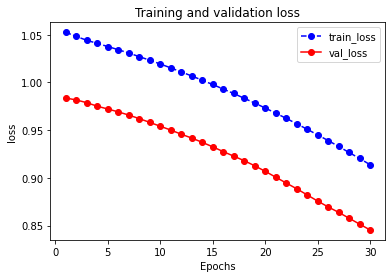

In [16]:
plot_metric(history, 'loss')


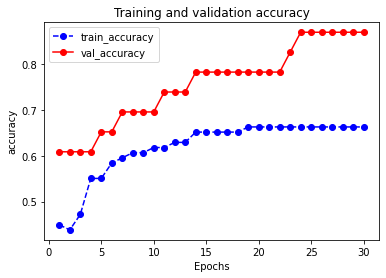

In [17]:
plot_metric(history, 'accuracy')

In [18]:
model_fun_api.evaluate(x = X_test,y = y_test)

38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9647755999314157, 0.55263156]

# Multi-input and multi-output model

## 2 inputs and 1 output

In [19]:
# 2 inputs, one structured data, the other image data
input_structure = Input(shape=(4,), name='input_structure')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structure)
x_2 = Dense(100, activation='relu')(input_image)

c = concatenate([x_1, x_2])

outputs = Dense(3, activation='softmax', name='outputs')(c)

model = Model(inputs=[input_structure, input_image], outputs=outputs)

In [20]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structure (InputLayer)    [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 10)           50          input_structure[0][0]            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 100)          25700       input_image[0][0]                
____________________________________________________________________________________________

## 1 input and 2 outputs

In [21]:
# only one input
input_image = Input(shape=(256,), name='input_image')

# middle layer
x = Dense(300, activation='relu')(input_image)

# output layer
output_1 = Dense(1, activation='sigmoid', name='output_1')(x)
output_2 = Dense(3, activation='softmax', name='output_2')(x)

model = Model(inputs=input_image, outputs=[output_1, output_2])



In [22]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 300)          77100       input_image[0][0]                
__________________________________________________________________________________________________
output_1 (Dense)                (None, 1)            301         dense_5[0][0]                    
__________________________________________________________________________________________________
output_2 (Dense)                (None, 3)            903         dense_5[0][0]                    
Total params: 78,304
Trainable params: 78,304
Non-trainable params: 0
______________________

## 2 inputs and 2 outputs

In [23]:
# 2 inputs, one structured data, the other image data
input_structured = Input(shape=(4,), name='input_structured')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structured)
x_2 = Dense(300, activation='relu')(input_image)

c = concatenate([x_1, x_2])

# output layser
output_1 = Dense(1, activation='sigmoid', name='output_1')(c)
output_2 = Dense(3, activation='softmax', name='output_2')(c)

model = Model(inputs=[input_structured, input_image], outputs=[output_1, output_2])

In [24]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structured (InputLayer)   [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 10)           50          input_structured[0][0]           
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 300)          77100       input_image[0][0]                
____________________________________________________________________________________________

In [ ]:
a =5
if a==4:
    print('ok')
elif 